<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Стиль-заголовков" data-toc-modified-id="Стиль-заголовков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Стиль заголовков</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Обработка-выбросов" data-toc-modified-id="Обработка-выбросов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обработка выбросов</a></span></li><li><span><a href="#Устранение-пропусков" data-toc-modified-id="Устранение-пропусков-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Устранение пропусков</a></span></li><li><span><a href="#Изменение-типов-данных-(продолжение)" data-toc-modified-id="Изменение-типов-данных-(продолжение)-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Изменение типов данных (продолжение)</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Обработка-аномальных-значений" data-toc-modified-id="Обработка-аномальных-значений-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Обработка аномальных значений</a></span></li></ul></li><li><span><a href="#Подготовка-данных-для-исследования" data-toc-modified-id="Подготовка-данных-для-исследования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка данных для исследования</a></span></li><li><span><a href="#Исследование-моделей-" data-toc-modified-id="Исследование-моделей--4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследование моделей <a id="models_research"></a></a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Итоги-проекта" data-toc-modified-id="Итоги-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Итоги проекта</a></span></li></ul></div>

# Определение стоимости автомобилей

Сервису по продаже автомобилей с пробегом необходимо построить модель машинного обучения (ML - machine learning) для определения рыночной стоимости автомобиля клиента.

**Цель исследования**

   1. Необходимо построить модель машинного обучения, с максимальными критериями качества предсказания, с минимальным временем обучения и предсказания, для задачи регрессии, которая предскажет (спрогнозирует) рыночную стоимость автомобиля.
   2. Необходимо использовать метрику `RMSE`, для оценки качества моделей.
   3. Значение метрики `RMSE`, для выбранной модели, должно быть меньше 2500.
   4. При исследовании, необходимо использовать модель градиентного бустинга и более простые модели.


**Исследование пройдёт в пять этапов:**
 1. Обзор данных;
 2. Предобработка данных;
 3. Подготовка данных для исследования;
 4. Исследование моделей;
 5. Тестирование модели.

## Обзор данных

Составим первое представление о данных.

**1. Импортируем библиотеку pandas и другие. Считаем данные из csv-файла в датафрейм и сохраним в переменную `df`.**

In [1]:
# обновим библиотеку 'scikit-learn' до последней версии......
!pip install --upgrade scikit-learn
#
## обновим библиотеку 'scipy' до последней версии
!pip install --upgrade scipy
#
## обновим библиотеку 'pandas' до последней версии
!pip install --upgrade pandas
#
## обновим библиотеку 'matplotlib' до последней версии
!pip install --upgrade matplotlib
#
## обновим библиотеку 'matplotlib' до последней версии
!pip install --upgrade seaborn
#
## обновим библиотеку 'lightgbm' до последней версии
!pip install --upgrade lightgbm
#
## обновим библиотеку 'category_encoders' до последней версии
!pip install --upgrade category_encoders
#

In [2]:
# импорт библиотеки 'pandas'
import pandas as pd

# импорт библиотеки 'numpy'
import numpy as np

# импортируем библиотеку 'matplotlib.pyplot' для построения графиков
import matplotlib.pyplot as plt

# импортируем библиотеку 'matplotlib.pyplot' для построения графиков
import seaborn as sns

# импорт библиотеки для модели "DummyRegressor"
from sklearn.dummy import DummyRegressor

# импорт библиотеки для модели "линейной регрессии"
from sklearn.linear_model import LinearRegression

# импорт библиотеки для модели "дерево решений для регрессии"
from sklearn.tree import DecisionTreeRegressor

# импорт библиотеки для модели "случайный лес для регрессии"
from sklearn.ensemble import RandomForestRegressor

# импорт библиотеки для оценки качества модели
from sklearn.metrics import (mean_squared_error,
                             mean_absolute_error,
                             mean_squared_log_error,
                             r2_score,
                             mean_absolute_percentage_error,
                             make_scorer)

# импорт библиотеки для кросс-валидации
from sklearn.model_selection import (train_test_split,
                                     KFold,
                                     GridSearchCV,
                                     RandomizedSearchCV,
                                     cross_val_score)

# импорт библиотеки для масштабирования признаков
from sklearn.preprocessing import (StandardScaler,
                                   MinMaxScaler,
                                   OneHotEncoder)


# импорт библиотеки 'sklearn.impute'
from sklearn.impute import KNNImputer

# импорт библиотеки для 'pipeline'
from sklearn.pipeline import Pipeline

# импорт библиотеки 'lightGBM'
import lightgbm as lgb

# импорт библиотеки 'category_encoders'
import category_encoders as ce

In [3]:
try:
    # читаем данные из csv-файла и сохраняем их в виде датафрейма в 'df',
    df = pd.read_csv('***')
except:
    # в случае отсутствия csv-файла в локальном месторасположении, читаем его из облачного хранилища
    # и сохраняем данные в виде датафрейма в 'df'
    df = pd.read_csv('***')

**2. Выведем первые пять строчек датафрейма `df` на экран.**

In [4]:
# посмотрим первых пять строк датафрейма 'df
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


**3. Выведем основную информацию о датафрейме с помощью метода `info()`.**

In [5]:
# получение общей информации о данных в датафрейме 'df'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

Итак, в таблице 16 столбцов. Типы данных в столбцах: `int64` и `object`.

* `DateCrawled` — дата скачивания анкеты из базы;
* `Price` — цена (евро);
* `VehicleType` — тип автомобильного кузова;
* `RegistrationYear` — год регистрации автомобиля;
* `Gearbox` — тип коробки передач;
* `Power` — мощность (л. с.);
* `Model` — модель автомобиля;
* `Kilometer` — пробег (км);
* `RegistrationMonth` — месяц регистрации автомобиля;
* `FuelType` — тип топлива;
* `Brand` — марка автомобиля;
* `Repaired` — была машина в ремонте или нет;
* `DateCreated` — дата создания анкеты;
* `NumberOfPictures` — количество фотографий автомобиля;
* `PostalCode` — почтовый индекс владельца анкеты (пользователя);
* `LastSeen` — дата последней активности пользователя.

Количество значений в определенных столбцах различается. Значит, в данных есть пропущенные значения. Столбцы: `DateCrawled`, `Repaired`, `DateCreated` и `LastSeen`, содержат неподходящие типы данных. В названиях всех колонок (столбцов) таблицы, есть нарушение стиля.

**4. Построим общую гистограмму для всех числовых столбцов таблицы в датафрейме `df`.**

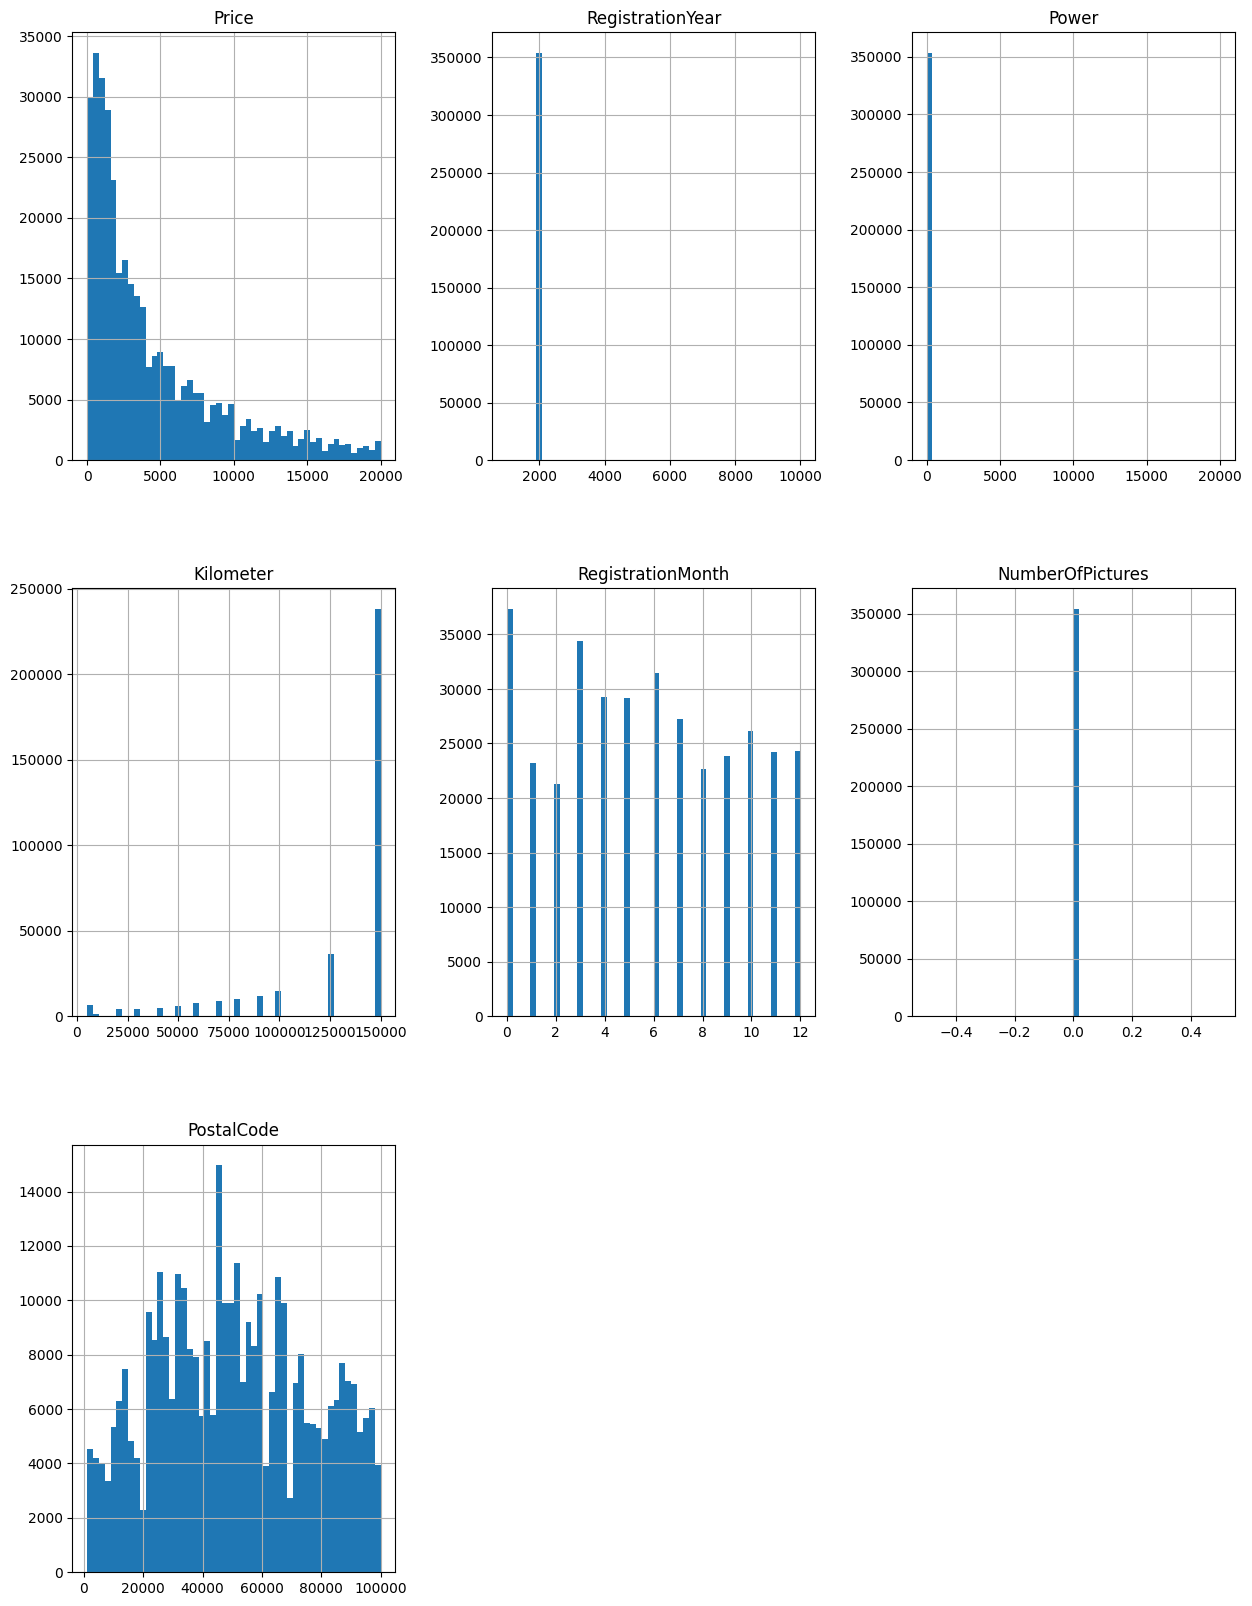

In [6]:
# с помощью функции 'hist' построим общую гистограмму
df.hist(figsize=(15, 20), bins= 50);

**5. Посмотрим статистическую информацию по каждому числовому столбцу таблицы, в датафрейме `df`.**

In [7]:
# выведем статистическую информацию
df.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


**6. Создадим глобальную переменную для хранения размера исходного датасета.**

In [8]:
DF_SOURCE_SIZE = df.shape[0]

**Выводы**

Предварительно можно утверждать, что данных достаточно для исследования. Но встречаются пропуски. Возможно, есть аномальные значения (артефакты), дубликаты (явные/неявные) и выбросы в данных. Столбцы: `DateCrawled`, `Repaired`, `DateCreated` и `LastSeen`, содержат неподходящий тип данных. В названиях всех колонок (столбцов) таблицы, есть нарушение стиля.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

Исправим стиль в заголовках столбцов, устраним пропуски в данных. Проверим данные на артефакты (аномалии), дубликаты (явные/неявные), пропуски, выбросы и, при нахождении, исправим. Проверим данные на несоответствие типу и, при нахождении, изменим тип.

### Стиль заголовков

**7. Выведем на экран названия столбцов:**

In [9]:
# выводим перечень названий столбцов таблицы в датафрейме 'df'
df.columns.tolist()

['DateCrawled',
 'Price',
 'VehicleType',
 'RegistrationYear',
 'Gearbox',
 'Power',
 'Model',
 'Kilometer',
 'RegistrationMonth',
 'FuelType',
 'Brand',
 'Repaired',
 'DateCreated',
 'NumberOfPictures',
 'PostalCode',
 'LastSeen']

**8. Приведём названия столбцов таблицы в соответствии с хорошим стилем:**
 - несколько слов в названии записываются в «змеином_регистре»,
 - все символы строчные,
 - без пробелов,
 - название на латинице.

In [10]:
# переименуем название столбцов с некорректным стилем
df = df.rename(columns={'DateCrawled' : 'date_crawled',
                        'Price' : 'price',
                        'VehicleType' : 'vehicle_type',
                        'RegistrationYear' : 'registration_year',
                        'Gearbox' : 'gearbox',
                        'Power' : 'power',
                        'Model' : 'model',
                        'Kilometer' : 'kilometer',
                        'RegistrationMonth' : 'registration_month',
                        'FuelType' : 'fuel_type',
                        'Brand' : 'brand',
                        'Repaired' : 'repaired',
                        'DateCreated' : 'date_created',
                        'NumberOfPictures' : 'number_of_pictures',
                        'PostalCode' : 'postal_code',
                        'LastSeen' : 'last_seen'})

In [11]:
# проверим результат переименования некорректных столбцов
df.columns.tolist()

['date_crawled',
 'price',
 'vehicle_type',
 'registration_year',
 'gearbox',
 'power',
 'model',
 'kilometer',
 'registration_month',
 'fuel_type',
 'brand',
 'repaired',
 'date_created',
 'number_of_pictures',
 'postal_code',
 'last_seen']

### Изменение типов данных

**9. Посмотрим существующие типы данных для всех столбцов.**

In [12]:
# выводим список всех столбцов таблицы и их типы
df.dtypes

date_crawled          object
price                  int64
vehicle_type          object
registration_year      int64
gearbox               object
power                  int64
model                 object
kilometer              int64
registration_month     int64
fuel_type             object
brand                 object
repaired              object
date_created          object
number_of_pictures     int64
postal_code            int64
last_seen             object
dtype: object

Изменение типов данных, требуется для:

* `date_crawled` с типа `object` на тип `datetime64`;
* `price` с типа `int64` на тип `int32`;
* `registration_year` с типа `int64` на тип `int32`;
* `power` с типа `int64` на тип `int32`;
* `kilometer` с типа `int64` на тип `int32`;
* `registration_month` с типа `int64` на тип `int32`;
* `repaired` с типа `object` на тип `int32`;
* `date_created` с типа `object` на тип `datetime64`;
* `number_of_pictures` с типа `int64` на тип `int32`;
* `postal_code` с типа `int64` на тип `int32`;
* `last_seen` с типа `object` на тип `datetime64`.

**10. Заменим строковый тип данных `object`,  в столбце `date_crawled`,  на тип данных `datetime64`.**

In [13]:
df['date_crawled'] = pd.to_datetime(df['date_crawled'], format='%Y-%m-%d %H:%M:%S')

**11. Заменим целочисленный тип данных `int64`,  в столбце `price`,  на целочисленный тип данных `int32`.**

In [14]:
df['price'] = df['price'].astype('int32')

**12. Заменим целочисленный тип данных `int64`,  в столбце `registration_year`,  на целочисленный тип данных `int32`.**

In [15]:
df['registration_year'] = df['registration_year'].astype('int32')

**13. Заменим целочисленный тип данных `int64`,  в столбце `power`,  на целочисленный тип данных `int32`.**

In [16]:
df['power'] = df['power'].astype('int32')

**14. Заменим целочисленный тип данных `int64`,  в столбце `kilometer`,  на целочисленный тип данных `int32`.**

In [17]:
df['kilometer'] = df['kilometer'].astype('int32')

**15. Заменим целочисленный тип данных `int64`,  в столбце `registration_month`,  на целочисленный тип данных `int32`.**

In [18]:
df['registration_month'] = df['registration_month'].astype('int32')

**16. Заменим строковый тип данных `object`,  в столбце `date_created`,  на тип данных `datetime64`.**

In [19]:
df['date_created'] = pd.to_datetime(df['date_created'], format='%Y-%m-%d %H:%M:%S')

**17. Заменим целочисленный тип данных `int64`,  в столбце `number_of_pictures`,  на целочисленный тип данных `int32`.**

In [20]:
df['number_of_pictures'] = df['number_of_pictures'].astype('int32')

**18. Заменим целочисленный тип данных `int64`,  в столбце `postal_code`,  на целочисленный тип данных `int32`.**

In [21]:
df['postal_code'] = df['postal_code'].astype('int32')

**19. Заменим строковый тип данных `object`,  в столбце `last_seen`,  на тип данных `datetime64`.**

In [22]:
df['last_seen'] = pd.to_datetime(df['last_seen'], format='%Y-%m-%d %H:%M:%S')

**20. Проверим результат преобразования типов.**

In [23]:
# выводим список всех столбцов таблицы и их типы
df.dtypes

date_crawled          datetime64[ns]
price                          int32
vehicle_type                  object
registration_year              int32
gearbox                       object
power                          int32
model                         object
kilometer                      int32
registration_month             int32
fuel_type                     object
brand                         object
repaired                      object
date_created          datetime64[ns]
number_of_pictures             int32
postal_code                    int32
last_seen             datetime64[ns]
dtype: object

Преобразование типа, для столбца `repaired`, будет выполнено после заполнения пропусков.

### Обработка выбросов

In [24]:
/# функция вычисления левой и правой границы (левое и правое "крайние" значения данных) [на диаграмме размаха]
# параметр 'feature' - признак (столбец из датафрейма)
def left_right_extreme_data_boundary(feature):
    
    if(feature.empty):
        return np.nan, np.nan
    
    # вычислим квантили q3 (75%-й) и q1 (25% -й)
    q3, q1 = np.percentile(feature, [75,25])
    
    # вычислим межквантильный интервал iqr
    iqr = q3 - q1

    # рассчитаем левую и правую границу (левое и правое "крайние" значения данных)
    return np.around((q1 - iqr * 1.5), decimals=3), np.around((q3 + iqr * 1.5), decimals=3)



# функция обработки выбросов в одном признаке
def outlier_handling_in_feature(dataframe,
                                column_name,
                                min_range_limit,
                                max_range_limit):
    
    # удалим из датасета выбросы 'dataframe', из столбца 'column_name', выбросы
    dataframe = dataframe[~(dataframe[column_name] < min_range_limit) &
                          ~(dataframe[column_name] > max_range_limit)]
    
    return dataframe



def check_in_outlier(features, column_names):
    
    for column_name in column_names:
        left_border, right_border = left_right_extreme_data_boundary(features[column_name].fillna(0))
        
        if ( (left_border > features[column_name].min()) or
             (right_border < features[column_name].max()) ):
            return False
        
    return True


# функция обработки выбросов в одном датафрейме
def outlier_handling(features, column_names):
    
    work = True;
    while(work):
        for column_name in column_names:
        
            left_border, right_border = left_right_extreme_data_boundary(features[column_name].fillna(0))
        
        
            features = outlier_handling_in_feature(features,
                                                   column_name,
                                                   left_border,
                                                   right_border)
        
        if (features.empty or check_in_outlier(features, column_names)):
            break
    
    return features

**21. Проверим датасет: `df`, на наличие выбросов.**

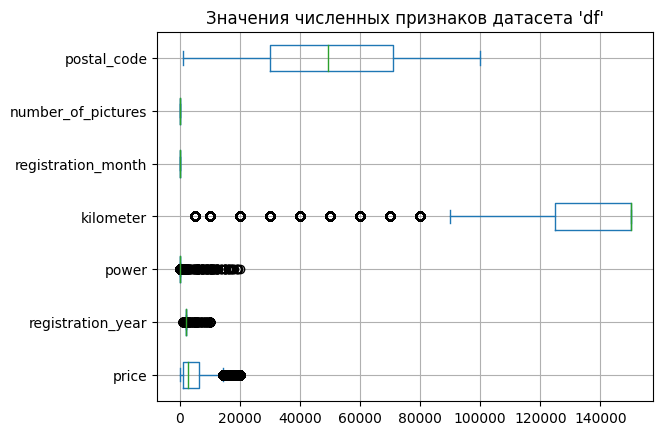

In [25]:
# построим диаграмму размаха для датафрейма 'df', чтобы проверить признаки на наличие выбросов
df.plot(kind='box',
        vert=False,
        title='Значения численных признаков датасета \'df\'',
        grid=True);

Попытка обработать выбросы во всех признаках датафрейма `df`, привела к уменьшению датафрема до `49.25%` от `100%` данных. Урезать данные на столько мы не можем, так как это приведёт к невозможности проведения дальнейшего исследования. `50.75%` процентов данных, от общего числа данных датафрема, не может быть выбросами, а вероятнее всего, это характер самих данных. Обработаем выбросы, только в целевом признаке `price`, а остальные три признака, в которых есть выбросы, мы, только, проверим на аномальные значения, на следующих этапах. 

**22. Удалим выбросы в целевом признаке `price`.**

In [26]:
# удалим выбросы в целевых признаках датафрейма 'df'
df_without_outlier = outlier_handling(df, ['price'])

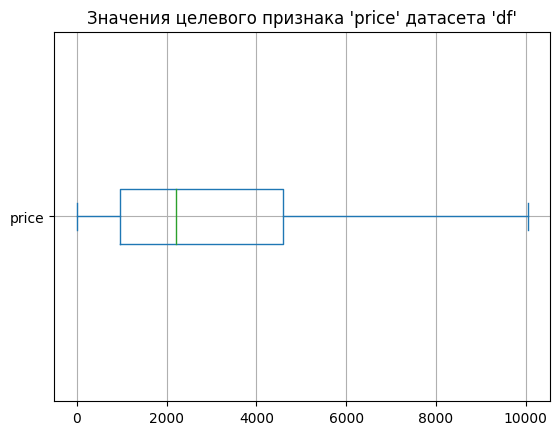

In [27]:
# проверим результат удаления выбросов в целевом признаке `price`
df_without_outlier['price'].plot(kind='box',
                                 vert=False,
                                 title='Значения целевого признака \'price\' датасета \'df\'',
                                 grid=True);

### Устранение пропусков

**23. Выведем количество пропущенных значений для каждого столбца, используя комбинацию двух методов.**

In [28]:
# посчитаем количество пропусков по каждому столбцу в отдельности
df_without_outlier.isna().sum()

date_crawled              0
price                     0
vehicle_type          36010
registration_year         0
gearbox               19160
power                     0
model                 18357
kilometer                 0
registration_month        0
fuel_type             31559
brand                     0
repaired              67895
date_created              0
number_of_pictures        0
postal_code               0
last_seen                 0
dtype: int64

Есть пропуски в столбцах: 
* `vehicle_type` - тип автомобильного кузова;
* `gearbox`      - тип коробки передач;
* `model`        - модель автомобиля;
* `fuel_type`    - тип топлива;
* `repaired`     - была машина в ремонте или нет.

**24. Определим, какую долю составляют пропущенные значения.** 

Необходимо определить какую долю, в процентах, составляют пропущенные значения, в каждом из столбцов с пропусками, по отношению к количеству всех элементов в каждом из этих столбцов. Данная информация поможет определить, смогут ли они повлиять на результат нашего исследования.

In [29]:
# определим, в процентах, какую долю составляют пропущенные значения, в каждом из столбцов с пропусками
df_without_outlier.isna().mean() * 100

date_crawled           0.000000
price                  0.000000
vehicle_type          11.574238
registration_year      0.000000
gearbox                6.158356
power                  0.000000
model                  5.900258
kilometer              0.000000
registration_month     0.000000
fuel_type             10.143609
brand                  0.000000
repaired              21.822629
date_created           0.000000
number_of_pictures     0.000000
postal_code            0.000000
last_seen              0.000000
dtype: float64

Доля пропущенных значений, в столбцах:

* `vehicle_type` - **11.57 %**;
* `gearbox`      - **6.15 %**;
* `model`        - **5.90 %**;
* `fuel_type`    - **10.14 %**;
* `repaired`     - **21.82 %**.

достаточно весомая, что существенно может повлиять на результат нашего исследования. Особенно в столбце `repaired`.

**25. Обработаем пропуски в столбце `repaired`.**

Признак `repaired` - является строковым и указывает, была машина в ремонте или нет. С большой вероятностью, продавец не указал данный признак, так как машина не была в ремонте. Следовательно, в данном случае, мы заполним все пропуски значением `no`.

In [30]:
# заполняем пропуски
df_without_outlier['repaired'].fillna('no', inplace=True)

**26. Обработаем пропуски в столбцах: `vehicle_type`, `model`, `fuel_type`.**

Данные признаки являются строковыми и мы их заполним, уже используемым в них, значением: `other`.

In [31]:
# заполняем пропуски
df_without_outlier['vehicle_type'].fillna('other', inplace=True)
df_without_outlier['model'].fillna('other', inplace=True)
df_without_outlier['fuel_type'].fillna('other', inplace=True)

**27. Обработаем пропуски в столбце: `gearbox`.**

Признак является строковым и указывает тип коробки передач. С большой вероятностью, продавец не указал данный признак для типа коробки передач - ручная. Следовательно, в данном случае, мы заполним все пропуски значением `manual`.

In [32]:
df_without_outlier['gearbox'].fillna('manual', inplace=True)

# проверим результат заполнения пропусков, в процентах
df_without_outlier.isna().mean() * 100

date_crawled          0.0
price                 0.0
vehicle_type          0.0
registration_year     0.0
gearbox               0.0
power                 0.0
model                 0.0
kilometer             0.0
registration_month    0.0
fuel_type             0.0
brand                 0.0
repaired              0.0
date_created          0.0
number_of_pictures    0.0
postal_code           0.0
last_seen             0.0
dtype: float64

Возможные причины появления пропусков в исходных данных:
 - 1. Человеческий фактор;
 - 2. Ошибки системы;
 - 3. Ошибки процесса выгрузки данных.

### Изменение типов данных (продолжение)

**28. Заменим строковый тип данных `object`, в столбце `repaired`, на тип данных `bool`.**

In [33]:
# определим функцию преобразования категориального признака строкового типа в булевой.
def convert_to_bool(string):
    if string == 'yes':
        return True
    else: 
        return False

In [34]:
df_without_outlier['repaired'] = df_without_outlier['repaired'].apply(convert_to_bool) 
df_without_outlier['repaired'] = df_without_outlier['repaired'].astype('int32')

# проверим преобразование типа
df_without_outlier.dtypes

date_crawled          datetime64[ns]
price                          int32
vehicle_type                  object
registration_year              int32
gearbox                       object
power                          int32
model                         object
kilometer                      int32
registration_month             int32
fuel_type                     object
brand                         object
repaired                       int32
date_created          datetime64[ns]
number_of_pictures             int32
postal_code                    int32
last_seen             datetime64[ns]
dtype: object

### Обработка дубликатов

**29. Проверим датафрейм `df_without_outlier` на наличие дубликатов.**

In [35]:
# проверяем количество строк дубликатов в 'df_without_outlier'
df_without_outlier.duplicated().sum()

4

In [36]:
# удалим строки дубликаты в 'df_without_outlier'
df_without_outlier.drop_duplicates(inplace=True)

# проверяем количество строк дубликатов в 'df_without_outlier', после обработки
df_without_outlier.duplicated().sum()

0

### Обработка аномальных значений

В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке.

Обработаем аномальные значения, только в тех признаках, которые будут использованы для обучения моделей и предсказаний.

**30. Проверим аномальные значения в признаке `price`.**

In [37]:
df_without_outlier['price'].min()

0

In [38]:
df_without_outlier['price'].max()

10050

Признак `price` - цена (евро), содержит аномальные значения. Значения равные нулю, нулевая цена, необходимо удалить.

In [39]:
# удаляем аномальные значения
df_without_outlier = df_without_outlier[df_without_outlier['price'] > 0]

# проверяем результат удаления аномальных значений
df_without_outlier['price'].min()

1

**31. Проверим аномальные значения в признаке `vehicle_type`.**

In [40]:
# выводим список уникальных значений столбца 'vehicle_type' 
df_without_outlier['vehicle_type'].value_counts()

vehicle_type
sedan          77283
small          75343
wagon          54499
other          35105
bus            24126
convertible    15106
coupe          11947
suv             6937
Name: count, dtype: int64

Аномальные значения отсутствуют.

**32. Проверим аномальные значения в признаке `registration_year`.**

In [41]:
# выводим список уникальных значений столбца 'registration_year' 
df_without_outlier['registration_year'].sort_values().unique()

array([1000, 1001, 1039, 1111, 1234, 1255, 1300, 1400, 1500, 1600, 1602,
       1800, 1910, 1923, 1925, 1928, 1929, 1930, 1931, 1932, 1934, 1935,
       1936, 1937, 1938, 1941, 1942, 1943, 1944, 1945, 1946, 1948, 1950,
       1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2066, 2200, 2222, 2290, 2500, 2800, 2900, 3000,
       3200, 3700, 3800, 4000, 4100, 4500, 4800, 5000, 5300, 5555, 5600,
       5900, 5911, 6000, 6500, 7000, 7100, 7800, 8000, 8200, 8500, 8888,
       9000, 9450, 9999], dtype=int32)

In [42]:
df_without_outlier['date_crawled'].max()

Timestamp('2016-04-07 14:36:58')

Признак `registration_year` - год регистрации автомобиля, содержит аномальные значения. Года регистрации, которые меньше 1910 года и больше апреля 2016 года, необходимо удалить. Авто, которые зарегистрированы после апреля (04) 2016 года, являются аномальными. Так как признак `date_crawled` - дата скачивания анкеты из базы, содержит самую позднюю дату: `2016-04-07`.  

In [43]:
# удаляем аномальные значения
df_without_outlier =\
    df_without_outlier[(df_without_outlier['registration_year'] >= 1910) & (df_without_outlier['registration_year'] <= 2016)]
df_without_outlier = df_without_outlier[ ~((df_without_outlier['registration_year'] == 2016) & (df_without_outlier['registration_month'] <= 4))]

# проверяем результат удаления аномальных значений
df_without_outlier['registration_year'].sort_values().unique()

array([1910, 1923, 1925, 1928, 1929, 1930, 1931, 1932, 1934, 1935, 1936,
       1937, 1938, 1941, 1942, 1943, 1944, 1945, 1946, 1948, 1950, 1951,
       1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962,
       1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int32)

**33. Проверим аномальные значения в признаке `gearbox`.**

In [44]:
# выводим список уникальных значений столбца 'gearbox' 
df_without_outlier['gearbox'].value_counts()

gearbox
manual    237207
auto       45774
Name: count, dtype: int64

Аномальные значения отсутствуют.

**34. Проверим аномальные значения в признаке `power`.**

In [45]:
# выводим список уникальных значений столбца 'power' 
df_without_outlier['power'].sort_values().unique()

array([    0,     1,     2,     3,     4,     5,     6,     7,     8,
           9,    10,    11,    12,    13,    14,    15,    16,    17,
          18,    19,    20,    21,    22,    23,    24,    25,    26,
          27,    28,    29,    30,    31,    32,    33,    34,    35,
          36,    37,    38,    39,    40,    41,    42,    43,    44,
          45,    46,    47,    48,    49,    50,    51,    52,    53,
          54,    55,    56,    57,    58,    59,    60,    61,    62,
          63,    64,    65,    66,    67,    68,    69,    70,    71,
          72,    73,    74,    75,    76,    77,    78,    79,    80,
          81,    82,    83,    84,    85,    86,    87,    88,    89,
          90,    91,    92,    93,    94,    95,    96,    97,    98,
          99,   100,   101,   102,   103,   104,   105,   106,   107,
         108,   109,   110,   111,   112,   113,   114,   115,   116,
         117,   118,   119,   120,   121,   122,   123,   124,   125,
         126,   127,

Признак `power` - мощность (л. с.), содержит аномальные значения. Мощность равная нулю и больше 11000, необходимо удалить.

In [46]:
# удаляем аномальные значения
df_without_outlier =\
    df_without_outlier[(df_without_outlier['power'] > 0) & (df_without_outlier['power'] < 11000)]

# проверяем результат удаления аномальных значений
df_without_outlier['power'].sort_values().unique()

array([    1,     2,     3,     4,     5,     6,     7,     8,     9,
          10,    11,    12,    13,    14,    15,    16,    17,    18,
          19,    20,    21,    22,    23,    24,    25,    26,    27,
          28,    29,    30,    31,    32,    33,    34,    35,    36,
          37,    38,    39,    40,    41,    42,    43,    44,    45,
          46,    47,    48,    49,    50,    51,    52,    53,    54,
          55,    56,    57,    58,    59,    60,    61,    62,    63,
          64,    65,    66,    67,    68,    69,    70,    71,    72,
          73,    74,    75,    76,    77,    78,    79,    80,    81,
          82,    83,    84,    85,    86,    87,    88,    89,    90,
          91,    92,    93,    94,    95,    96,    97,    98,    99,
         100,   101,   102,   103,   104,   105,   106,   107,   108,
         109,   110,   111,   112,   113,   114,   115,   116,   117,
         118,   119,   120,   121,   122,   123,   124,   125,   126,
         127,   128,

**35. Проверим аномальные значения в признаке `model`.**

In [47]:
# выводим список уникальных значений столбца 'model' 
df_without_outlier['model'].sort_values().unique()

array(['100', '145', '147', '156', '159', '1_reihe', '1er', '200',
       '2_reihe', '300c', '3_reihe', '3er', '4_reihe', '500', '5_reihe',
       '5er', '601', '6_reihe', '6er', '7er', '80', '850', '90', '900',
       '9000', '911', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a8',
       'a_klasse', 'accord', 'agila', 'alhambra', 'almera', 'altea',
       'amarok', 'antara', 'arosa', 'astra', 'auris', 'avensis', 'aveo',
       'aygo', 'b_klasse', 'b_max', 'beetle', 'berlingo', 'bora',
       'boxster', 'bravo', 'c1', 'c2', 'c3', 'c4', 'c5', 'c_klasse',
       'c_max', 'c_reihe', 'caddy', 'calibra', 'captiva', 'carisma',
       'carnival', 'cayenne', 'cc', 'ceed', 'charade', 'cherokee',
       'citigo', 'civic', 'cl', 'clio', 'clk', 'clubman', 'colt', 'combo',
       'cooper', 'cordoba', 'corolla', 'corsa', 'cr_reihe', 'croma',
       'crossfire', 'cuore', 'cx_reihe', 'defender', 'delta', 'discovery',
       'doblo', 'ducato', 'duster', 'e_klasse', 'elefantino', 'eos',
       'escort', 'espac

Аномальные значения отсутствуют.

**36. Проверим аномальные значения в признаке `kilometer`.**

In [48]:
# выводим список уникальных значений столбца 'kilometer' 
df_without_outlier['kilometer'].sort_values().unique()

array([  5000,  10000,  20000,  30000,  40000,  50000,  60000,  70000,
        80000,  90000, 100000, 125000, 150000], dtype=int32)

Аномальные значения отсутствуют.

**37. Проверим аномальные значения в признаке `registration_month`.**

In [49]:
# выводим список уникальных значений столбца 'registration_month' 
df_without_outlier['registration_month'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

Признак `registration_month` - месяц регистрации автомобиля, содержит аномальные значения. Значения равные нулю, нулевой месяц, необходимо удалить.

In [50]:
# удаляем аномальные значения
df_without_outlier =\
    df_without_outlier[df_without_outlier['registration_month'] > 0]

# проверяем результат удаления аномальных значений
df_without_outlier['registration_month'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

**38. Проверим аномальные значения в признаке `fuel_type`.**

In [51]:
# выводим список уникальных значений столбца 'fuel_type' 
df_without_outlier['fuel_type'].sort_values().unique()

array(['cng', 'electric', 'gasoline', 'hybrid', 'lpg', 'other', 'petrol'],
      dtype=object)

Аномальные значения отсутствуют.

**39. Проверим аномальные значения в признаке `brand`.**

In [52]:
# выводим список уникальных значений столбца 'brand' 
df_without_outlier['brand'].sort_values().unique()

array(['alfa_romeo', 'audi', 'bmw', 'chevrolet', 'chrysler', 'citroen',
       'dacia', 'daewoo', 'daihatsu', 'fiat', 'ford', 'honda', 'hyundai',
       'jaguar', 'jeep', 'kia', 'lada', 'lancia', 'land_rover', 'mazda',
       'mercedes_benz', 'mini', 'mitsubishi', 'nissan', 'opel', 'peugeot',
       'porsche', 'renault', 'rover', 'saab', 'seat', 'skoda', 'smart',
       'sonstige_autos', 'subaru', 'suzuki', 'toyota', 'trabant',
       'volkswagen', 'volvo'], dtype=object)

Аномальные значения отсутствуют.

**40. Проверим аномальные значения в признаке `repaired`.**

In [53]:
# выводим список уникальных значений столбца 'repaired' 
df_without_outlier['repaired'].value_counts()

repaired
0    211839
1     24993
Name: count, dtype: int64

Аномальные значения отсутствуют.

**41. Проверим, какая доля исходного датасета осталась после фильтрации.**

In [54]:
# рассчитаем размер доли исходного датасета 'df', которая осталась после фильтрации, в процентах
(df_without_outlier.shape[0] / DF_SOURCE_SIZE) * 100

66.8320310185146

Размер доли исходного датасета, которая осталась после фильтрации: 

* `df_without_outlier` - **`66.83%`**.

**Выводы**

1. Предобработка обнаружила следующие проблемы в данных:

- нарушение стиля заголовков столбцов;
- несоответствие типа значений хранимым данным;
- выбросы;
- пропуски;
- дубликаты;
- аномальные значения.

 
2. Привели заголовки столбцов в соответствие с установленным стилем.
3. Преобразовали типы данных из одного в другой, где это было необходимо.
4. Обработали выбросы, где это было необходимо.
5. Обработали пропуски, где это было необходимо.
6. Удалили дубликаты.
7. Удалили аномальные значения.

После такой предобработки данных, исследование станет более точным.

Теперь можно перейти к подготовке данных. 

## Подготовка данных для исследования

Изучим исходное множество признаков, которые будут использованы для обучения модели, на: мультиколлинеарность признаков (высокая степень коррелированности признаков), их избыточное количество, содержание их значений (категориальные признаки, количественные признаки с разными разбросами значений).

1. Столбец `date_crawled` - дата скачивания анкеты из базы, не несёт полезной дополнительной информации для обучения модели. Его наличие, в исходном множестве признаков, ведёт к избыточности.

2. Столбец `date_created` - дата создания анкеты, не несёт полезной дополнительной информации для обучения модели. Его наличие, в исходном множестве признаков, ведёт к избыточности.

3. Столбец `number_of_pictures` - количество фотографий автомобиля, не несёт полезной дополнительной информации для обучения модели. Его наличие, в исходном множестве признаков, ведёт к избыточности.

4. Столбец `postal_code` - почтовый индекс владельца анкеты (пользователя), не несёт полезной дополнительной информации для обучения модели. Его наличие, в исходном множестве признаков, ведёт к избыточности.

5. Столбец `last_seen` - дата последней активности пользователя, не несёт полезной дополнительной информации для обучения модели. Его наличие, в исходном множестве признаков, ведёт к избыточности.

*Вышеуказанные признаки необходимо удалить из исходного множества признаков.*

6. Признак `price`, является численным целевым признаком нашей модели и его необходимо отфильтровать, на этапе разделения обучающей выборки на множество признаков и целевой признак, из множества признаков (предикторов), которые используются для обучения модели.

7. Столбцы: `vehicle_type`, `gearbox`, `model`, `fuel_type` и `brand`, имеют строковый тип данных и следовательно являются категориальными номинальными признаками. Данные столбцы необходимо преобразовать в численные признаки техникой `CatBoostEncoder`.

8. Столбцы: `registration_year`, `power`, `kilometer`, и `registration_month`, а также столбцы, полученные в пункте `7`, являются численными признаками, но имеют разный разброс значений. При обучении модели, алгоритм может решить, что признаки с большими значениями и разбросом, важнее. Для избежания данной ловушки, необходимо масштабировать данные признаки с помощью метода - стандартизации данных.

**42. Создадим новый датафрейм для обучения модели (ml - machine learning), посредством удаления избыточных признаков из множества признаков.**

In [55]:
df_ml = df_without_outlier.drop(['date_crawled', 'date_created', 'number_of_pictures', 'postal_code', 'last_seen'], axis=1)
df_ml.shape

(236832, 11)

**43. Создадим отдельные датафреймы с признаками и целевым признаком.**

In [56]:
features = df_ml.drop(['price'], axis=1)
target = df_ml['price']

**44. Cоздадим переменную `random_state` для фиксации псевдослучайности.**

In [57]:
# создадим переменную 'random_state' для фиксации псевдослучайности для алгоритма обучения
# и других алгоритмов в нашем проекте
random_state = 753

**45. Разделим исходные данные на две выборки: обучающую и тестовую.**

Применим метод кросс-валидации: "Hold-out".

In [58]:
# разделим набор данных на обучающую выборку (75%) и тестовую (25%)
# для этого мы установим параметр 'test_size' = 0.25
features_train, features_test, target_train, target_test =\
    train_test_split(features, target, test_size=0.25, random_state=random_state)

In [59]:
# выведем размер полученной обучающей выборки признаков
features_train.shape

(177624, 10)

In [60]:
# выведем размер полученной обучающей выборки целевого признака
target_train.shape

(177624,)

In [61]:
# выведем размер полученной тестовой выборки признаков
features_test.shape

(59208, 10)

In [62]:
# выведем размер полученной тестовой выборки целевого признака
target_test.shape

(59208,)

**46. Преобразуем категориальные признаки в численные.**

Создадим новые датафреймы, на основе датафреймов: `features_train` и `features_test`, которые будут содержать преобразованные категориальные признаки в численные, с помощью техники OHE - One-Hot Encoding.

In [63]:
# определим функцию преобразования категориальных признаков в численные
def categorical_features_to_numerical(features_train, target_train, features_test, categorical_features, random_state):
    
    # создадим объект класса 'CatBoostEncoder' 
    cbe = ce.cat_boost.CatBoostEncoder(cols=categorical_features, random_state=random_state)

    # настроим объект (обучим модель 'CatBoostEncoder') на обучающих данных и преобразуем их
    features_train = cbe.fit_transform(features_train, target_train)
    features_test = cbe.transform(features_test)

    return  features_train, features_test

In [64]:
# создадим список категориальных признаков
categorical_features = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand']

# преобразуем признаки
features_train, features_test =\
    categorical_features_to_numerical(features_train, target_train, features_test, categorical_features, random_state)

In [65]:
features_train.shape

(177624, 10)

In [66]:
features_test.shape

(59208, 10)

**47. Масштабируем численные признаки.**

Масштабируем численные признаки с разным разбросом значений, методом стандартизации данных, в каждой полученой выборке множества признаков: обучающей и тестовой.

In [67]:
# определим функцию стандартизации признаков
def features_standardization(features_train, features_test, column_names):
    
    # создадим объект класса 'StandardScaler' и настроим объект на обучающих данных
    scaler = StandardScaler()
    
    # масштабируем признаки
    features_train[column_names] = scaler.fit_transform(features_train[column_names])
    features_test[column_names] = scaler.transform(features_test[column_names])
    
    return features_train, features_test

In [68]:
features_train.describe()

,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired
count,177624.000000,177624.000000,177624.000000,177624.000000,177624.000000,177624.000000,177624.000000,177624.000000,177624.000000,177624.000000
mean,3444.743948,2001.989821,3444.700816,114.864365,3438.121258,132530.457596,6.401016,3442.154339,3444.094854,0.106101
std,705.395113,5.871913,457.731006,107.786186,1244.245135,32962.427869,3.343372,763.736039,774.244346,0.307967
min,1687.116518,1910.000000,2456.930432,1.000000,748.208317,5000.000000,1.000000,2117.941663,901.482608,0.000000
25%,2571.694674,1999.000000,3235.752868,75.000000,2690.051505,125000.000000,4.000000,3008.594524,2672.797587,0.000000
50%,3540.731327,2002.000000,3243.059676,105.000000,3333.766925,150000.000000,6.000000,3013.479083,3481.800274,0.000000
75%,3677.036013,2006.000000,3247.645594,140.000000,4036.418612,150000.000000,9.000000,4629.794183,4147.462972,0.000000
max,5823.197824,2016.000000,5122.791295,10910.000000,9206.945484,150000.000000,12.000000,6248.197824,7233.599171,1.000000


In [69]:
features_test.describe()

,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired
count,59208.000000,59208.000000,59208.000000,59208.000000,59208.000000,59208.000000,59208.000000,59208.000000,59208.000000,59208.00000
mean,3450.669034,2002.031263,3449.055167,114.894913,3449.736756,132389.710850,6.391045,3439.638411,3451.931826,0.10382
std,706.179721,5.892959,458.033528,98.865291,1251.557635,32807.123603,3.351876,767.316671,763.803698,0.30503
min,2480.825578,1937.000000,3240.752786,1.000000,736.544310,5000.000000,1.000000,2364.854461,1083.911128,0.00000
25%,2567.418411,1999.000000,3240.752786,75.000000,2736.373806,125000.000000,4.000000,3006.106365,2664.941552,0.00000
50%,3520.952088,2002.000000,3240.752786,105.000000,3327.112916,150000.000000,6.000000,3006.106365,3479.167944,0.00000
75%,3670.692058,2006.000000,3240.752786,140.000000,4040.776951,150000.000000,9.000000,4673.899900,4139.750626,0.00000
max,5470.817905,2016.000000,4456.202413,8404.000000,9235.947503,150000.000000,12.000000,5501.281554,6400.896918,1.00000


In [70]:
numerical_features = features_train.columns

In [71]:
# масштабируем численные признаки 
features_train, features_test = features_standardization(features_train, features_test, numerical_features)

In [72]:
features_train.describe()

,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired
count,1.776240e+05,1.776240e+05,1.776240e+05,1.776240e+05,1.776240e+05,1.776240e+05,1.776240e+05,1.776240e+05,1.776240e+05,1.776240e+05
mean,4.321084e-16,1.279188e-14,-8.014927e-16,-5.680374e-17,6.316415e-16,-2.980196e-16,9.440621e-17,1.496098e-17,-4.448293e-17,4.320284e-17
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-2.491699e+00,-1.566612e+01,-2.157977e+00,-1.056394e+00,-2.161890e+00,-3.868975e+00,-1.615444e+00,-1.733867e+00,-3.284001e+00,-3.445200e-01
25%,-1.237678e+00,-5.091747e-01,-4.564876e-01,-3.698477e-01,-6.012255e-01,-2.284564e-01,-7.181440e-01,-5.676844e-01,-9.961964e-01,-3.445200e-01
50%,1.360764e-01,1.733478e-03,-4.405245e-01,-9.151816e-02,-8.386983e-02,5.299850e-01,-1.199438e-01,-5.612888e-01,4.869978e-02,-3.445200e-01
75%,3.293087e-01,6.829444e-01,-4.305056e-01,2.331997e-01,4.808530e-01,5.299850e-01,7.773565e-01,1.555044e+00,9.084601e-01,-3.445200e-01
max,3.371813e+00,2.385972e+00,3.666117e+00,1.001535e+02,4.636418e+00,5.299850e-01,1.674657e+00,3.674112e+00,4.894469e+00,2.902589e+00


In [73]:
features_test.describe()

,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired
count,59208.000000,59208.000000,59208.000000,59208.000000,59208.000000,59208.000000,59208.000000,59208.000000,59208.000000,59208.000000
mean,0.008400,0.007058,0.009513,0.000283,0.009335,-0.004270,-0.002982,-0.003294,0.010122,-0.007404
std,1.001115,1.003587,1.000664,0.917238,1.005880,0.995291,1.002547,1.004691,0.986518,0.990466
min,-1.366498,-11.067944,-0.445564,-1.056394,-2.171264,-3.868975,-1.615444,-1.410570,-3.048379,-0.344520
25%,-1.243740,-0.509175,-0.445564,-0.369848,-0.563996,-0.228456,-0.718144,-0.570942,-1.006343,-0.344520
50%,0.108036,0.001733,-0.445564,-0.091518,-0.089218,0.529985,-0.119944,-0.570942,0.045300,-0.344520
75%,0.320315,0.682944,-0.445564,0.233200,0.484356,0.529985,0.777357,1.612794,0.898499,-0.344520
max,2.872262,2.385972,2.209823,76.903723,4.659727,0.529985,1.674657,2.696132,3.818963,2.902589


**Выводы**

1. Мы создали:
   - новый датафрейм для обучения модели (ml - machine learning), посредством удаления избыточных признаков из множества признаков;
   - отдельные датафреймы, содержащие признаки и целевой признак для каждой выборки: обучающей и тестовой;
   - глобальную переменную `random_state`, в которой зафиксировали выбранную нами псевдослучайность, для дальнейшего использования на всех этапах исследования;
   - новые датафреймы, на основе датафреймов: `features_train` и `features_test`, которые содержат преобразованные категориальные признаки в численные.
   
2. Преобразовали категориальные признаки в численные.
3. Масштабировали признаки для каждой выборки множества признаков: обучающей и тестовой.

## Исследование моделей <a id='models_research'></a>

Для задачи регрессии мы рассмотрим четыре популярные модели: решающее дерево, случайный лес, линейная регрессия и градиентный бустинг.

Оценка качества моделей, будет производиться с использованием метода кросс-валидации: `K-Fold`.

In [74]:
# функция для исследования модели (поиск лучших гиперпараметров при лучшем значении метрики качества)
def model_research(model,
                   features,
                   target,
                   param_grid,
                   scoring='neg_root_mean_squared_error',
                   random_state=random_state,
                   n_jobs=-1):
    
    cv = KFold(shuffle=True, random_state=random_state)
    
    search = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring=scoring,
                          n_jobs=n_jobs,
                          cv=cv)

    search.fit(features, target)
    
    print("Лучшие параметры (CV score=%0.3f):" % -search.best_score_)
    print(search.best_params_)
    
    return search

**48. Исследуем модель на основе "решающего дерева".**

In [75]:
%%time
dtr_model = DecisionTreeRegressor(random_state=random_state)

param_grid = { 'splitter'  : ['best'],
               'max_depth' : [12] }

print("=========== Решающее дерево (обучающая выборка) ==========")
# найдем лучшие гиперпараметры, на обучающей выборке
gscv_dtr = model_research(dtr_model, features_train, target_train, param_grid)

print("RMSE:", -gscv_dtr.best_score_)
print("==========================================================")

=========== Решающее дерево (обучающая выборка) ==========
Лучшие параметры (CV score=1288.732):
{'max_depth': 12, 'splitter': 'best'}
RMSE: 1288.7318889679577
CPU times: user 1.52 s, sys: 196 ms, total: 1.72 s
Wall time: 17.2 s


In [76]:
dtr_model = DecisionTreeRegressor(splitter='best', max_depth=12, random_state=random_state)

In [77]:
%%time
# измерим время обучения модели
# обучим модель на тренировочной выборке
dtr_model.fit(features_train, target_train)

CPU times: user 1.54 s, sys: 0 ns, total: 1.54 s
Wall time: 1.54 s


DecisionTreeRegressor(max_depth=15, random_state=753)

Лучший результат модели на основе "решающего дерева", на обучающей выборке:
 - время обучения модели: **1.54 s**;
 - метрика RMSE: **1288.7318889679577**;
 - при гиперпараметрах модели:
   * `splitter` - **best**;
   * `max_depth` -  **12**.

**49. Исследуем модель на основе "случайного леса".**

In [78]:
%%time

rfr_model = RandomForestRegressor(random_state=random_state, n_jobs=-1)

param_grid = { 'n_estimators' : [100],
               'max_depth' : [20] }

print("=========== Cлучайный лес (обучающая выборка) ============")
# найдем лучшие гиперпараметры, на обучающей выборке
gscv_rfr = model_research(rfr_model, features_train, target_train, param_grid)

print("RMSE:", -gscv_rfr.best_score_)
print("==========================================================")

=========== Cлучайный лес (обучающая выборка) ============
Лучшие параметры (CV score=1131.865):
{'max_depth': 20, 'n_estimators': 100}
RMSE: 1131.86490905533
CPU times: user 3min 22s, sys: 1.04 s, total: 3min 23s
Wall time: 16min 20s


In [79]:
rfr_model = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=random_state, n_jobs=-1)

In [80]:
%%time
# измерим время обучения модели
# обучим модель на тренировочной выборке
rfr_model.fit(features_train, target_train)

CPU times: user 2min 58s, sys: 312 ms, total: 2min 59s
Wall time: 23.8 s


RandomForestRegressor(max_depth=17, n_jobs=-1, random_state=753)

Лучший результат модели на основе "случайного леса", на обучающей выборке:
 - время обучения модели: **23.8 s**;
 - метрика RMSE: **1131.86490905533**;
 - при гиперпараметрах модели: 
   * `n_estimators` - **100**;
   * `max_depth`    -  **20**.

**50. Исследуем модель на основе "линейной регрессии".**

In [81]:
%%time
lr_model = LinearRegression(n_jobs=-1)

param_grid = { }

print("=========== Линейная регрессия (обучающая выборка) ============")
# найдем лучшие гиперпараметры, на обучающей выборке
gscv_lr = model_research(lr_model, features_train, target_train, param_grid)

print("RMSE:", -gscv_lr.best_score_)
print("==========================================================")

=========== Линейная регрессия (обучающая выборка) ============
Лучшие параметры (CV score=1829.428):
{}
RMSE: 1829.4277416078749
CPU times: user 165 ms, sys: 104 ms, total: 269 ms
Wall time: 361 ms


In [82]:
%%time
# измерим время обучения модели
# обучим модель на тренировочной выборке
lr_model.fit(features_train, target_train)

CPU times: user 151 ms, sys: 120 ms, total: 271 ms
Wall time: 51.8 ms


LinearRegression(n_jobs=-1)

Лучший результат модели на основе "линейной регрессии", на обучающей выборке:
 - время обучения модели: **51.8 ms**;
 - метрика RMSE: **1829.4277416078749**.

**51. Исследуем модель на основе "градиентного бустинга" - LightGBM.**

In [83]:
%%time

gbm_model = lgb.LGBMRegressor(random_state=random_state, n_jobs=-1)

param_grid = { 'n_estimators' : [100],
               'max_depth' : [17] }

print("=========== Градиентный бустинг (обучающая выборка) ============")
# найдем лучшие гиперпараметры, на обучающей выборке
gscv_gbm = model_research(gbm_model, features_train, target_train, param_grid)

print("RMSE:", -gscv_gbm.best_score_)
print("==========================================================")

=========== Градиентный бустинг (обучающая выборка) ============
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.599951 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1627
[LightGBM] [Info] Number of data points in the train set: 142099, number of used features: 10
[LightGBM] [Info] Start training from score 3441.434472
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicit

In [84]:
gbm_model = lgb.LGBMRegressor(n_estimators=100, max_depth=17, random_state=random_state, n_jobs=-1)

In [85]:
%%time
# измерим время обучения модели
# обучим модель на тренировочной выборке
gbm_model.fit(features_train, target_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1628
[LightGBM] [Info] Number of data points in the train set: 177624, number of used features: 10
[LightGBM] [Info] Start training from score 3446.582590
CPU times: user 2.77 s, sys: 7.73 ms, total: 2.77 s
Wall time: 378 ms


LGBMRegressor(max_depth=16, n_jobs=-1, random_state=753)

Лучший результат модели на основе "градиентного бустинга", на обучающей выборке:
 - время обучения модели: **378 ms**;
 - метрика RMSE: **1168.6270472873662**;
   - при гиперпараметрах модели: 
   * `n_estimators`  - **100**;
   * `max_depth`     - **17**.

**52. Построим константную модель (`baseline` модель) и проверим её.**

Данная модель машинного обучения позволит нам проконтролировать, что наши более сложные модели дают нам прирост качества прогнозирования.

In [86]:
%%time
dr_model = DummyRegressor()

param_grid = {}

print("==== Dummy регрессия (baseline) (обучающая выборка) ======")
# найдем лучшие гиперпараметры, на обучающей выборке
gscv_dr = model_research(dr_model, features_train, target_train, param_grid)

print("RMSE:", -gscv_dr.best_score_)
print("==========================================================")

==== Dummy регрессия (baseline) (обучающая выборка) ======
Лучшие параметры (CV score=2655.691):
{}
RMSE: 2655.690810884079
CPU times: user 42.6 ms, sys: 36.2 ms, total: 78.8 ms
Wall time: 204 ms


In [87]:
%%time
# измерим время обучения модели
# обучим модель на тренировочной выборке
gscv_dr.fit(features_train, target_train)

CPU times: user 49 ms, sys: 12.1 ms, total: 61 ms
Wall time: 185 ms


GridSearchCV(cv=KFold(n_splits=5, random_state=753, shuffle=True),
             estimator=DummyRegressor(), n_jobs=-1, param_grid={},
             scoring='neg_root_mean_squared_error')

Лучший результат модели на основе "Dummy регрессии", на обучающей выборке:
 - время обучения модели: **185 ms**;
 - метрика RMSE: **2655.690810884079**.

**Общие выводы**


Все рассматриваемые модели, абсолютно адекватны. Они показали результат лучше, чем наша `Dummy`(baseline) модель.

Лучшая модель, на обучающей выборке, по метрике качества `RMSE` : `RandomForestRegressor` ("случайный лес").

Время обучения модели: **23.8 s**.

`RMSE` --  **1131.86490905533**, при гиперпараметрах модели:
* `n_estimators` - **100**;
* `max_depth`    -  **20**.

## Тестирование модели

In [88]:
# функция инкапсулирующая предсказание и вычисление RMSE этого предсказания для абстрактной модели
def model_testing(gscv, features, target, model_name):
    
    print(f"=========== {model_name} (тестовая выборка) ============")
    predictions = gscv.predict(features)
    print("RMSE:", mean_squared_error(target, predictions, squared=False))
    print("==========================================================")

**53. Проверим качество выбранной модели на тестовой выборке.**

Модель: "Случайный лес".

In [89]:
# получим предсказание и вычислим его RMSE
model_testing(gscv_rfr, 
              features_test,
              target_test,
              'Cлучайный лес')

=========== Cлучайный лес (тестовая выборка) ============
RMSE: 1111.3556392114483


In [90]:
%%time
# измерим время предсказания модели
# получим предсказания модели на тестовой выборке
gscv_rfr.predict(features_test);

CPU times: user 2.62 s, sys: 7.67 ms, total: 2.63 s
Wall time: 359 ms


In [91]:
# получим предсказание и вычислим его RMSE
model_testing(gscv_dtr, 
              features_test,
              target_test,
              'Решающее дерево')

=========== Решающее дерево (тестовая выборка) ============
RMSE: 1275.1073012747722


In [92]:
%%time
# измерим время предсказания модели
# получим предсказания модели на тестовой выборке
gscv_dtr.predict(features_test);

CPU times: user 8.22 ms, sys: 2 µs, total: 8.23 ms
Wall time: 8.04 ms


In [93]:
%%time
# измерим время предсказания модели
# получим предсказания модели на тестовой выборке
gscv_lr.predict(features_test);

CPU times: user 5.7 ms, sys: 20 µs, total: 5.72 ms
Wall time: 2.76 ms


In [94]:
# получим предсказание и вычислим его RMSE
model_testing(gscv_gbm, 
              features_test,
              target_test,
              'Градиентный бустинг')

=========== Градиентный бустинг (тестовая выборка) ============
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
RMSE: 1164.3673836589799


In [95]:
%%time
# измерим время предсказания модели
# получим предсказания модели на тестовой выборке
gscv_gbm.predict(features_test);

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
CPU times: user 603 ms, sys: 0 ns, total: 603 ms
Wall time: 89.2 ms


In [96]:
# получим предсказание и вычислим его RMSE
model_testing(gscv_dr, 
              features_test,
              target_test,
              'Dummy регрессия')

=========== Dummy регрессия (тестовая выборка) ============
RMSE: 2664.6176496204525


In [97]:
%%time
# измерим время предсказания модели
# получим предсказания модели на тестовой выборке
gscv_dr.predict(features_test);

CPU times: user 511 µs, sys: 7 µs, total: 518 µs
Wall time: 710 µs


**Выводы**

Значение метрики: `RMSE` (минимальная ошибка), на тестовой выборке, модели `RandomForestRegressor` : **1111.3556392114483**, не существенно отличаеся от значения `RMSE` полученной на обучающей выборке: **1131.86490905533**. Время предсказания модели (на тестовой выборке): **359 ms**.

Является лучшим значением на тестовой выборке среди всех моделей, что дополнительно подтверждает правильность выбора лучшей модели ML на [предыдущем этапе](#models_research) исследования. 

## Итоги проекта

1. Лучшая модель по критерию `RMSE` : `RandomForestRegressor`.

2. Показатели качества модели, на тестовой выборке:
- `RMSE`:   **1111.3556392114483** (минимальная ошибка);
- время обучения модели (на обучающей выборке): **23.8 s**;
- время предсказания модели: **359 ms**.

Гиперпараметры модели:
  * `n_estimators` - **100**;
  * `max_depth`    -  **20**.


3. Критерии качества прогнозирования модели, полученные на обучающей выборке, несущественно отличаются от критериев полученных на тестовой выборке, что говорит об устойчивости модели к новым входным данным.

    
*Рекомендации по улучшению модели*:
   - собрать большой массив исходных данных для обучения модели;
   - обучить модель на большом массиве данных;
   - скорректировать гиперпараметры;
   - обработать пропуски, в определенных признаках, в ручную. Получив данные, для этого, из справочников в открытом доступе.